In [1]:
import pandas as pd
import pyfolio
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

/Users/robertoruiz/opt/anaconda3/envs/RL_Final_Project/lib/python3.6/site-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [2]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [3]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [4]:
def get_account_value(model_name):
    df_account_value=pd.DataFrame()
    for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
        temp = pd.read_csv('results/secondRun_RR/account_value_trade_{}_{}.csv'.format(model_name,i))
        df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value=df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    return df_account_value

In [5]:
dji = pd.read_csv("data/^DJI.csv")
test_dji=dji[(dji['Date']>='2016-01-01') & (dji['Date']<='2020-06-30')]
test_dji = test_dji.reset_index(drop=True)
test_dji['daily_return']=test_dji['Adj Close'].pct_change(1)
dow_strat = backtest_strat(test_dji)

In [6]:
df=pd.read_csv('data/dow_30_2009_2020.csv')
rebalance_window = 63
validation_window = 63
unique_trade_date = df[(df.datadate > 20151001)&(df.datadate <= 20200707)].datadate.unique()
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

In [7]:
# Most modifications are made from here on forward

In [8]:
extensemble_acct_val = get_account_value('ensemble')
ppo_acct_val = get_account_value('PPO')
a2c_acct_val = get_account_value('A2C')
ddpg_acct_val = get_account_value('DDPG')
sac_acct_val = get_account_value('SAC')


0.9810894180943596
1.618489736489298
1.180436261248566
1.2543070112396895
1.300764676018016


In [9]:
extensemble_acct_val = get_daily_return(extensemble_acct_val)
ppo_acct_val = get_daily_return(ppo_acct_val)
a2c_acct_val = get_daily_return(a2c_acct_val)
ddpg_acct_val = get_daily_return(ddpg_acct_val)
sac_acct_val = get_daily_return(sac_acct_val)

Sharpe:  0.9810894180943596
Sharpe:  1.618489736489298
Sharpe:  1.180436261248566
Sharpe:  1.2543070112396895
Sharpe:  1.300764676018016


In [10]:
extensemble_acct_val['Date'] = test_dji['Date']
ppo_acct_val['Date'] = test_dji['Date']
a2c_acct_val['Date'] = test_dji['Date']
ddpg_acct_val['Date'] = test_dji['Date']
sac_acct_val['Date'] = test_dji['Date']

In [19]:
ppo_acct_val.head()

,account_value,datadate,daily_return,Date
0,1000000.000000,20160104,NaN,2016-01-04
1,999868.828720,20160105,-0.000131,2016-01-05
2,997917.893535,20160106,-0.001951,2016-01-06
3,994415.057058,20160107,-0.003510,2016-01-07
4,991725.325671,20160108,-0.002705,2016-01-08


In [11]:
extensemble_strat = backtest_strat(extensemble_acct_val[0:1097])
ppo_strat = backtest_strat(ppo_acct_val[0:1097])
a2c_strat = backtest_strat(a2c_acct_val[0:1097])
ddpg_strat = backtest_strat(ddpg_acct_val[0:1097])
sac_strat = backtest_strat(sac_acct_val[0:1097])

In [13]:
# extensemble_acct_val.to_csv('results/df_account_value_extensemble_daily_return.csv',index=False)
# ppo_acct_val.to_csv('results/df_account_value_ppo_daily_return.csv',index=False)
# a2c_acct_val.to_csv('results/df_account_value_a2c_daily_return.csv',index=False)
# ddpg_acct_val.to_csv('results/df_account_value_ddpg_daily_return.csv',index=False)
# sac_acct_val.to_csv('results/df_account_value_sac_daily_return.csv',index=False)

Start date,2016-01-04
End date,2020-05-12
Total months,52
,Backtest
Annual return,7.8%
Cumulative returns,38.4%
Annual volatility,7.9%
Sharpe ratio,0.99
Calmar ratio,0.86
Stability,0.95
Max drawdown,-9.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,8.99,2016-01-04,2016-02-11,2016-03-11,50
1,7.85,2016-07-20,2016-11-01,2016-12-09,103
2,6.37,2016-04-20,2016-06-27,2016-07-14,62
3,3.31,2018-06-11,2018-10-15,2019-01-25,165
4,2.94,2017-03-01,2017-04-13,2017-06-14,76


/Users/robertoruiz/opt/anaconda3/envs/RL_Final_Project/lib/python3.6/site-packages/pyfolio/tears.py:926: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


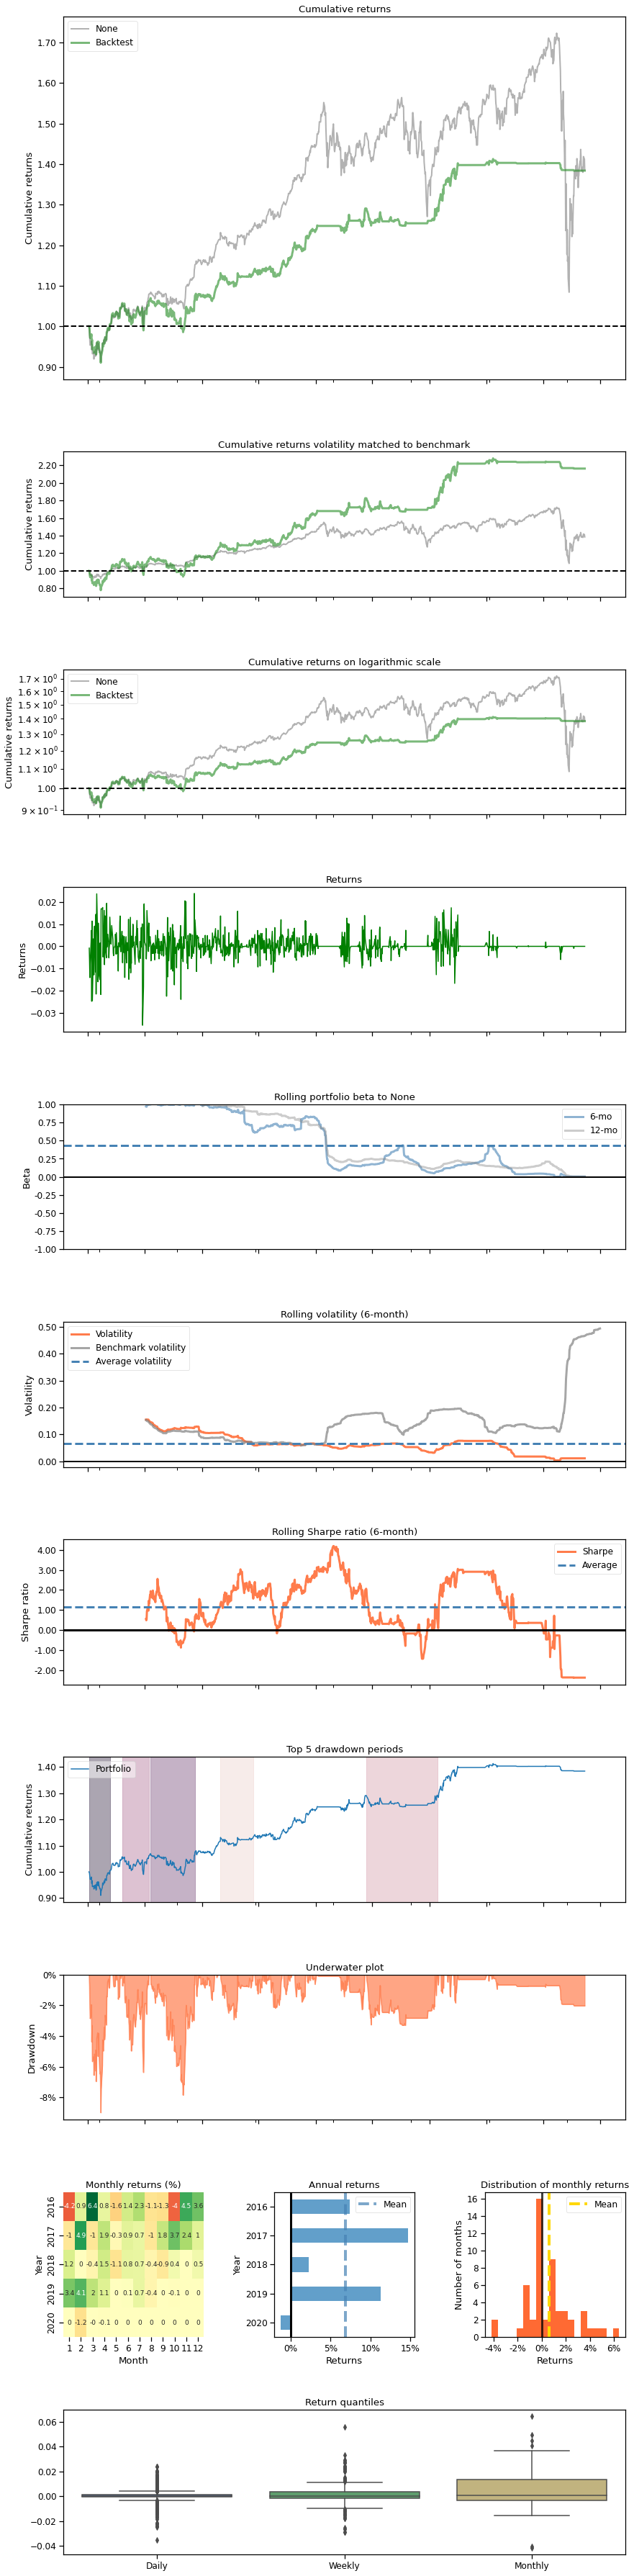

In [12]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = extensemble_strat,
                                   benchmark_rets=dow_strat, set_context=False)

Start date,2016-01-04
End date,2020-05-12
Total months,52
,Backtest
Annual return,12.5%
Cumulative returns,66.7%
Annual volatility,7.3%
Sharpe ratio,1.64
Calmar ratio,2.21
Stability,0.84
Max drawdown,-5.6%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,5.63,2016-04-20,2016-06-27,2016-07-08,58
1,5.06,2018-06-08,2018-06-27,2019-02-15,181
2,4.00,2016-02-04,2016-02-11,2016-02-17,10
3,3.98,2019-04-01,2020-04-08,NaT,NaN
4,3.55,2016-07-20,2016-11-04,2016-11-09,81


/Users/robertoruiz/opt/anaconda3/envs/RL_Final_Project/lib/python3.6/site-packages/pyfolio/tears.py:926: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


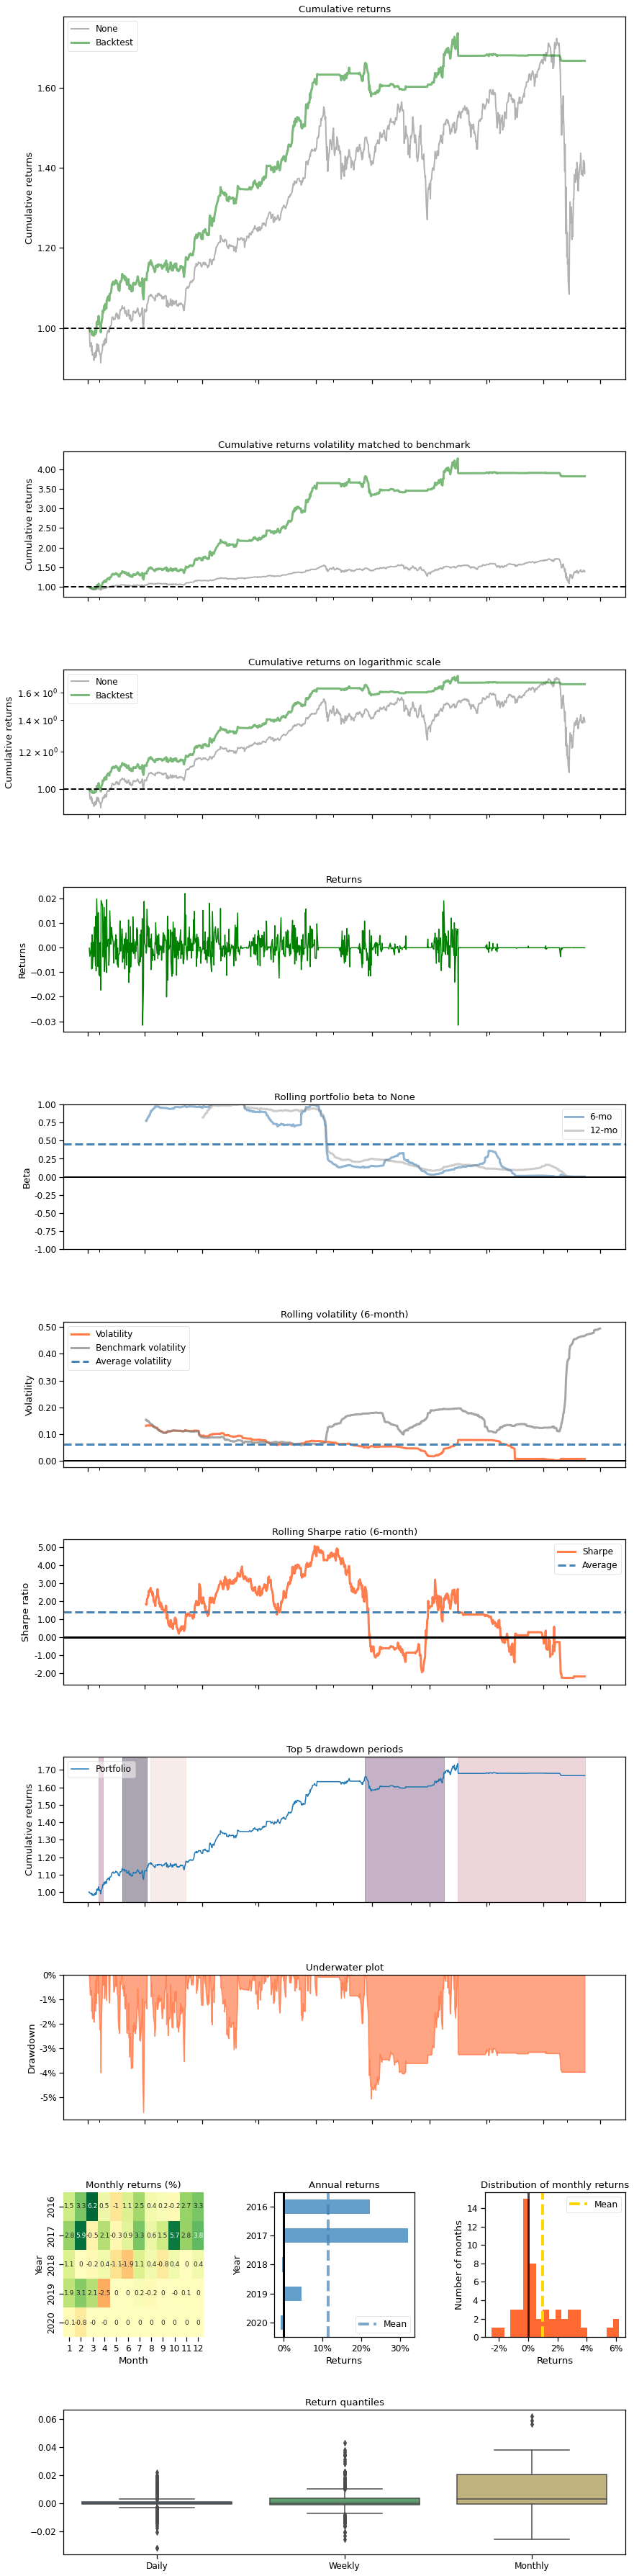

In [14]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = ppo_strat,
                                   benchmark_rets=dow_strat, set_context=False)

Start date,2016-01-04
End date,2020-05-12
Total months,52
,Backtest
Annual return,9.3%
Cumulative returns,47.4%
Annual volatility,7.7%
Sharpe ratio,1.19
Calmar ratio,1.13
Stability,0.89
Max drawdown,-8.2%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,8.21,2016-04-20,2016-11-01,2016-12-09,168
1,6.65,2016-02-01,2016-02-11,2016-02-25,19
2,3.58,2016-01-04,2016-01-20,2016-01-29,20
3,3.35,2019-03-18,2019-03-25,2019-07-23,92
4,3.16,2018-06-08,2018-06-27,2019-01-17,160


/Users/robertoruiz/opt/anaconda3/envs/RL_Final_Project/lib/python3.6/site-packages/pyfolio/tears.py:926: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


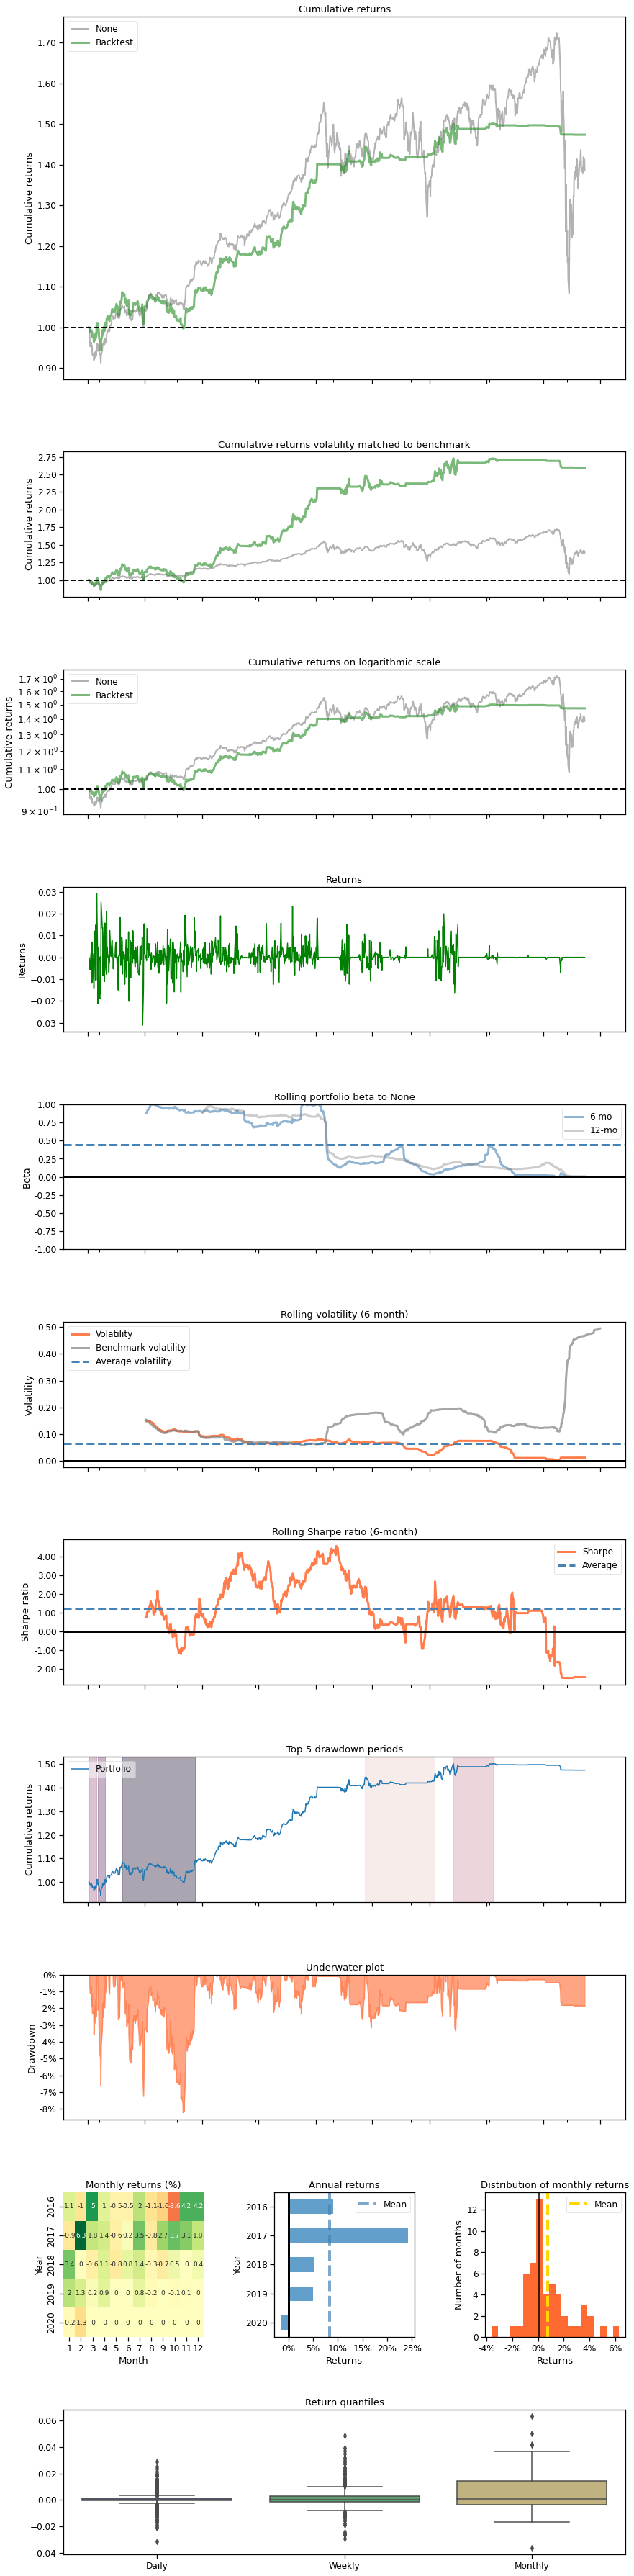

In [15]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = a2c_strat,
                                   benchmark_rets=dow_strat, set_context=False)

Start date,2016-01-04
End date,2020-05-12
Total months,52
,Backtest
Annual return,11.2%
Cumulative returns,58.6%
Annual volatility,8.7%
Sharpe ratio,1.27
Calmar ratio,1.40
Stability,0.93
Max drawdown,-8.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,8.00,2016-01-04,2016-02-11,2016-03-01,42
1,5.15,2016-04-20,2016-06-27,2016-07-11,59
2,4.68,2018-06-12,2018-10-15,2019-01-25,164
3,4.15,2016-09-22,2016-11-04,2016-11-14,38
4,3.75,2017-03-01,2017-04-13,2017-06-19,79


/Users/robertoruiz/opt/anaconda3/envs/RL_Final_Project/lib/python3.6/site-packages/pyfolio/tears.py:926: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


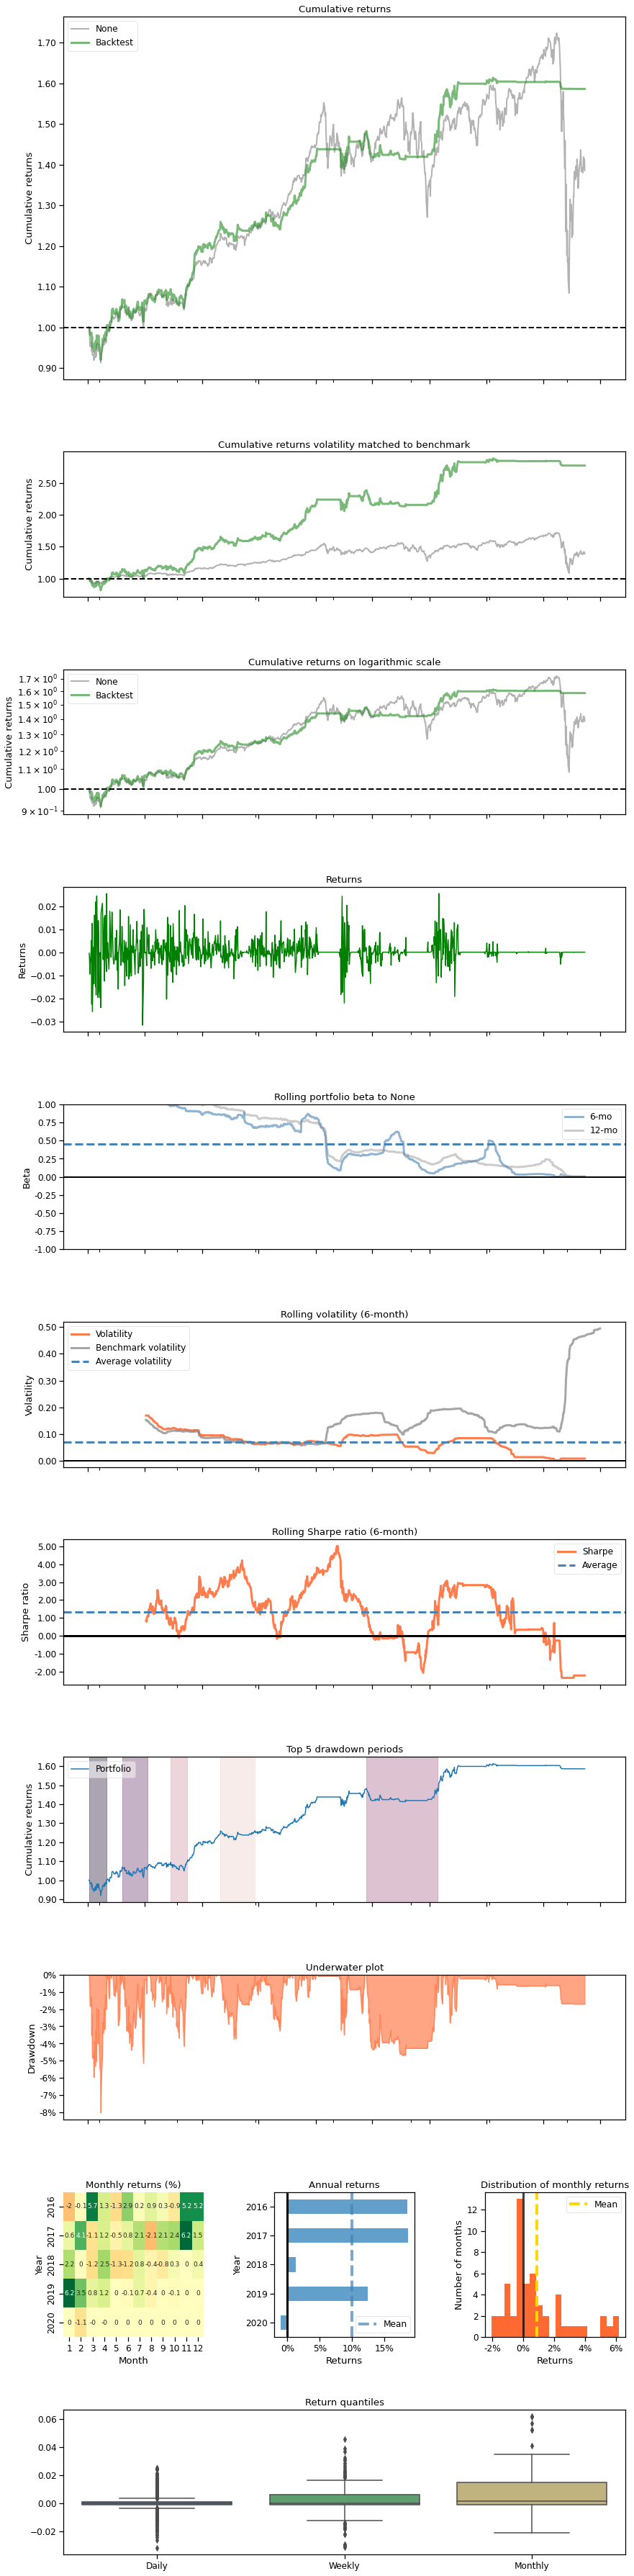

In [16]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = ddpg_strat,
                                   benchmark_rets=dow_strat, set_context=False)

Start date,2016-01-04
End date,2020-05-12
Total months,52
,Backtest
Annual return,10.8%
Cumulative returns,56.1%
Annual volatility,8.1%
Sharpe ratio,1.31
Calmar ratio,1.20
Stability,0.93
Max drawdown,-9.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,8.99,2016-01-04,2016-02-11,2016-03-11,50
1,5.52,2016-04-20,2016-05-13,2016-07-11,59
2,4.58,2016-07-22,2016-09-20,2016-11-10,80
3,3.56,2018-01-05,2018-04-02,2018-04-12,70
4,3.44,2018-06-11,2018-06-27,2018-07-25,33


/Users/robertoruiz/opt/anaconda3/envs/RL_Final_Project/lib/python3.6/site-packages/pyfolio/tears.py:926: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


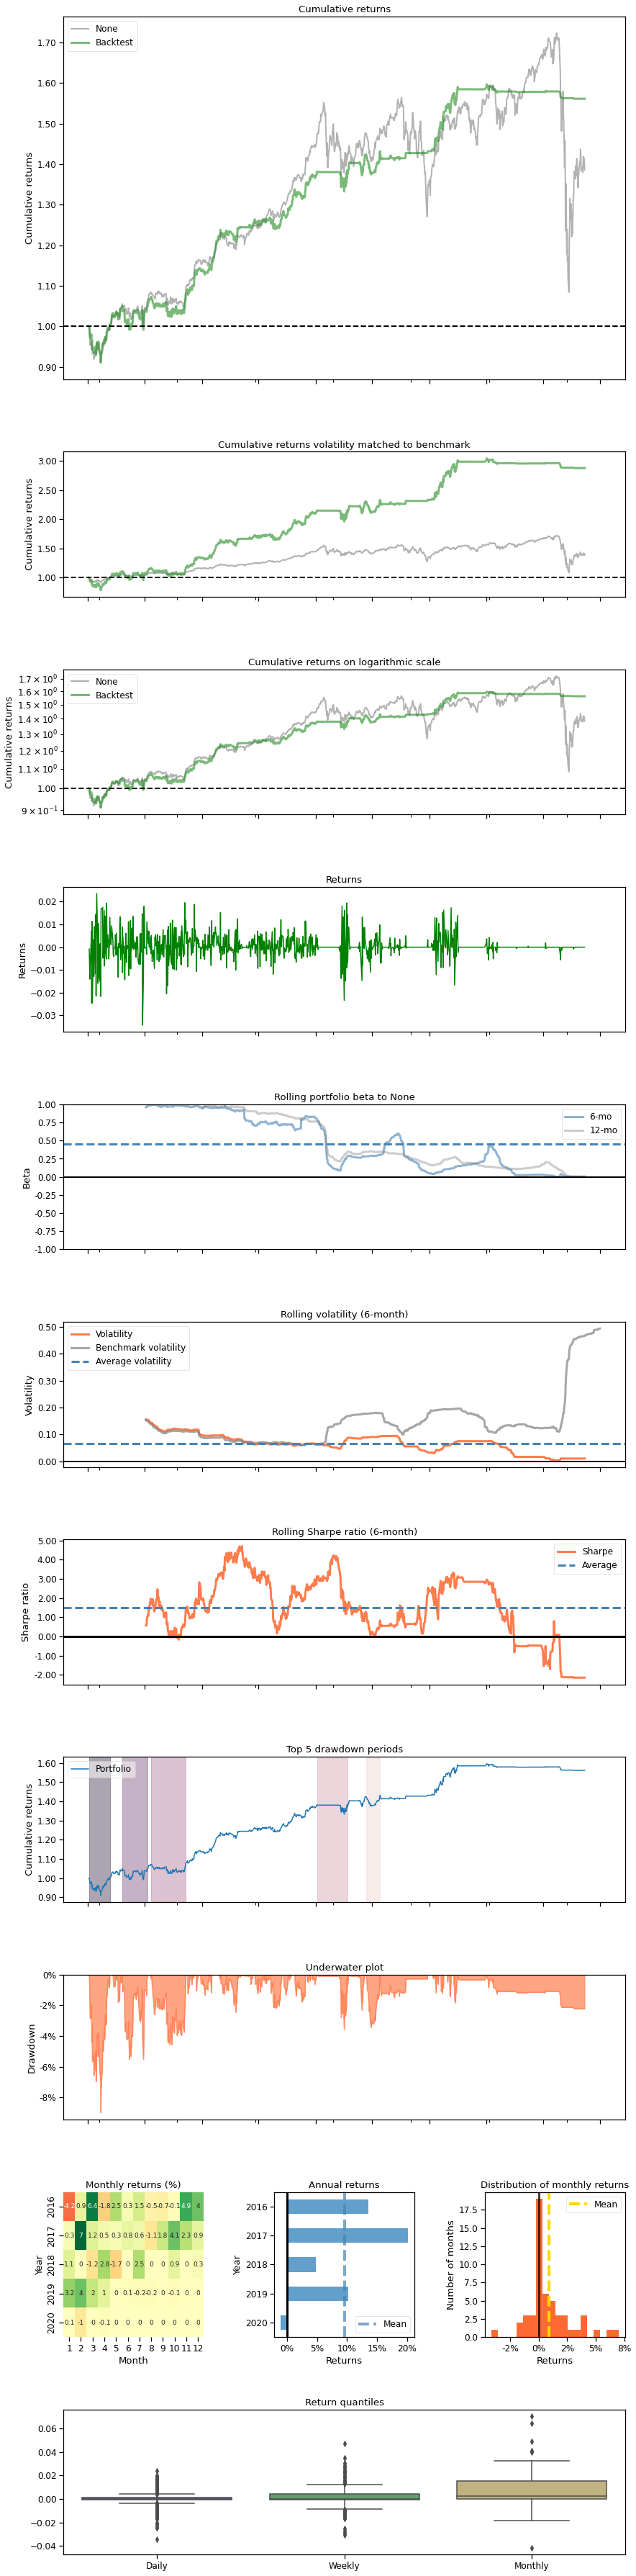

In [17]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = sac_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [31]:
extensemble_cum_ret = pyfolio.timeseries.cum_returns(extensemble_strat)
ppo_cum_ret = pyfolio.timeseries.cum_returns(ppo_strat)
a2c_cum_ret = pyfolio.timeseries.cum_returns(a2c_strat)
ddpg_cum_ret = pyfolio.timeseries.cum_returns(ddpg_strat)
sac_cum_ret = pyfolio.timeseries.cum_returns(sac_strat)
dow_cum_ret = pyfolio.timeseries.cum_returns(dow_strat)

/Users/robertoruiz/opt/anaconda3/envs/RL_Final_Project/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  """Entry point for launching an IPython kernel.
/Users/robertoruiz/opt/anaconda3/envs/RL_Final_Project/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  
/Users/robertoruiz/opt/anaconda3/envs/RL_Final_Project/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/robertoruiz/opt/anaconda3/envs/RL_Final_Project/lib/pytho

In [48]:
extensemble_cum_ret.name = "Extended Ensemble Method"
ppo_cum_ret.name = "PPO"
a2c_cum_ret.name = "A2C"
ddpg_cum_ret.name = "DDPG"
sac_cum_ret.name = "SAC"
dow_cum_ret.name = "DJIA"
df_cum_ret = pd.concat([extensemble_cum_ret, ppo_cum_ret, a2c_cum_ret, ddpg_cum_ret, sac_cum_ret, dow_cum_ret], axis = 1)

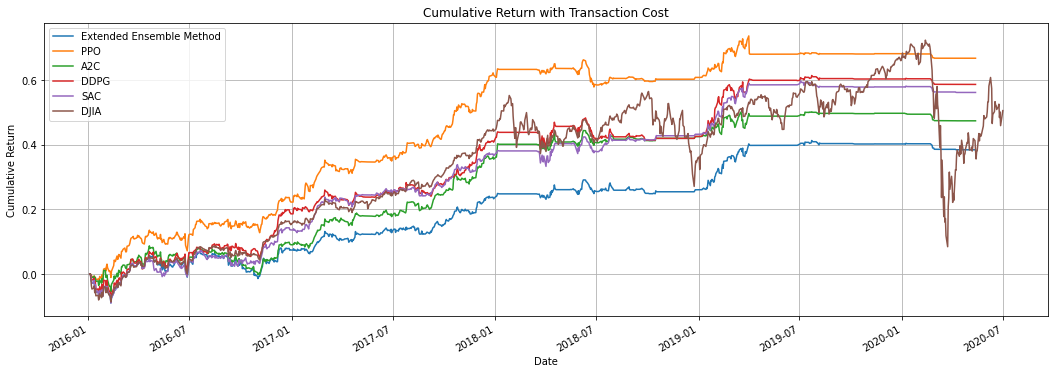

In [49]:
df_cum_ret.plot(figsize = (18, 6), title = "Cumulative Return with Transaction Cost", grid = True)
matplotlib.pyplot.ylabel("Cumulative Return")
matplotlib.pyplot.show()